# Project Title: Volatility Forecasting in India

---

## 1. Purpose of the Project

The primary objective of this project is to develop a machine learning model to forecast the volatility of financial markets using historical data. Volatility forecasting is an essential aspect of financial analysis, enabling better risk management, informed investment decisions, and enhanced portfolio optimization. Accurate predictions of market volatility are crucial for investors, financial institutions, and policymakers to navigate market uncertainties effectively.

---

## 2. Target

The target of this project is to predict the annualized volatility of the Nifty 50 index, a key benchmark index representing the 50 largest and most liquid companies listed on the National Stock Exchange of India (NSE). The project aims to:

- Build a robust machine learning model using historical market data.
- Improve prediction accuracy compared to baseline models.
- Analyze the importance of different features in predicting market volatility.
- Provide comprehensive insights and visualizations to understand the model's performance and data characteristics.

---

## 3. Data Collection and Preprocessing

**Data Collection:**

- Historical data for the Nifty 50 index was fetched from Yahoo Finance using the `yfinance` library.
- The data spans from January 1, 2010, to January 1, 2023.

**Data Preprocessing:**

- The data was cleaned by handling missing values through forward filling.
- Daily returns were computed as the percentage change in closing prices.
- Annualized volatility was calculated using a rolling window approach over a 252-day period (approximately one trading year).


#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf


: 

#### Scrape Data from Yahoo Finance

In [ ]:
# Define function to scrape historical data from Yahoo Finance
def fetch_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

# Fetching historical data for Nifty 50 index (ticker: ^NSEI)
ticker = "^NSEI"
start_date = "2010-01-01"
end_date = "2023-01-01"
data = fetch_data(ticker, start_date, end_date)

# Save data to CSV
data.to_csv('nifty50_historical_data.csv')
# Read the data from CSV
data = pd.read_csv('nifty50_historical_data.csv')

# Handle missing values by forward filling
data = data.ffill()

# Compute daily returns and volatility
data['Daily_Return'] = data['Close'].pct_change().fillna(0)
data['Volatility'] = data['Daily_Return'].rolling(window=252).std() * np.sqrt(252)  # Annualized volatility

# Drop rows with NaN values in Volatility (due to rolling window)
data = data.dropna()

: 

In [120]:
# Read the CSV file into a DataFrame
df = pd.read_csv('nifty50_historical_data.csv')
print(df)
# Display the DataFrame
df.head()  # Display the first few rows of the DataFrame

            Date          Open          High           Low         Close  \
0     2010-01-04   5200.899902   5238.450195   5167.100098   5232.200195   
1     2010-01-05   5277.149902   5288.350098   5242.399902   5277.899902   
2     2010-01-06   5278.149902   5310.850098   5260.049805   5281.799805   
3     2010-01-07   5281.799805   5302.549805   5244.750000   5263.100098   
4     2010-01-08   5264.250000   5276.750000   5234.700195   5244.750000   
...          ...           ...           ...           ...           ...   
3184  2022-12-26  17830.400391  18084.099609  17774.250000  18014.599609   
3185  2022-12-27  18089.800781  18149.250000  17967.449219  18132.300781   
3186  2022-12-28  18084.750000  18173.099609  18068.349609  18122.500000   
3187  2022-12-29  18045.699219  18229.699219  17992.800781  18191.000000   
3188  2022-12-30  18259.099609  18265.250000  18080.300781  18105.300781   

         Adj Close  Volume  
0      5232.200195       0  
1      5277.899902       0  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


---
## 4. Exploratory Data Analysis

### Daily Returns Visualization:

The plot of daily returns helps visualize the variability and trends in the data. This visualization is crucial for understanding the daily fluctuations in the Nifty 50 index, which is essential for predicting market volatility.



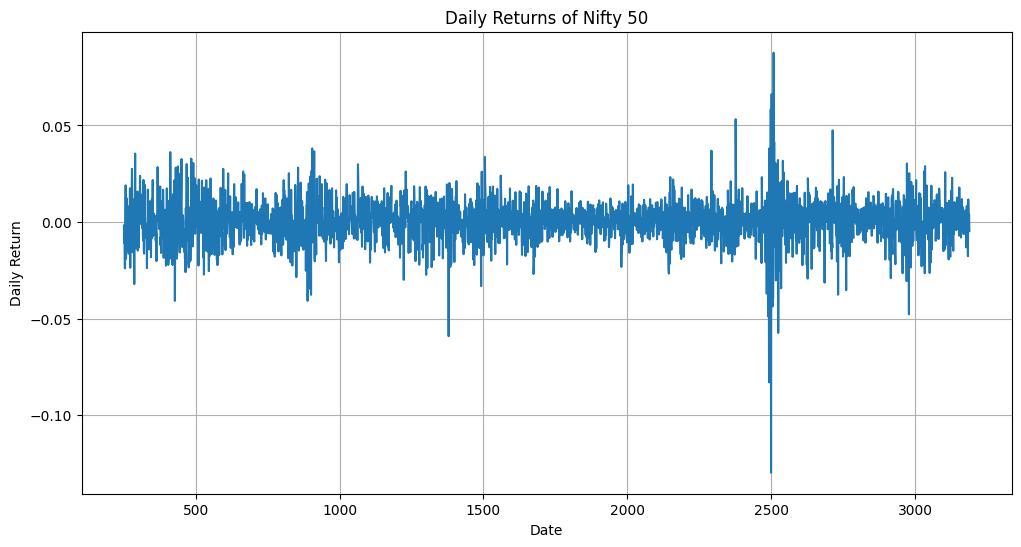

In [107]:
# Plotting daily returns
plt.figure(figsize=(12, 6))
data['Daily_Return'].plot()
plt.title('Daily Returns of Nifty 50')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


## Volatility Visualization:

The plot of annualized volatility over time provides insights into the market's risk dynamics.

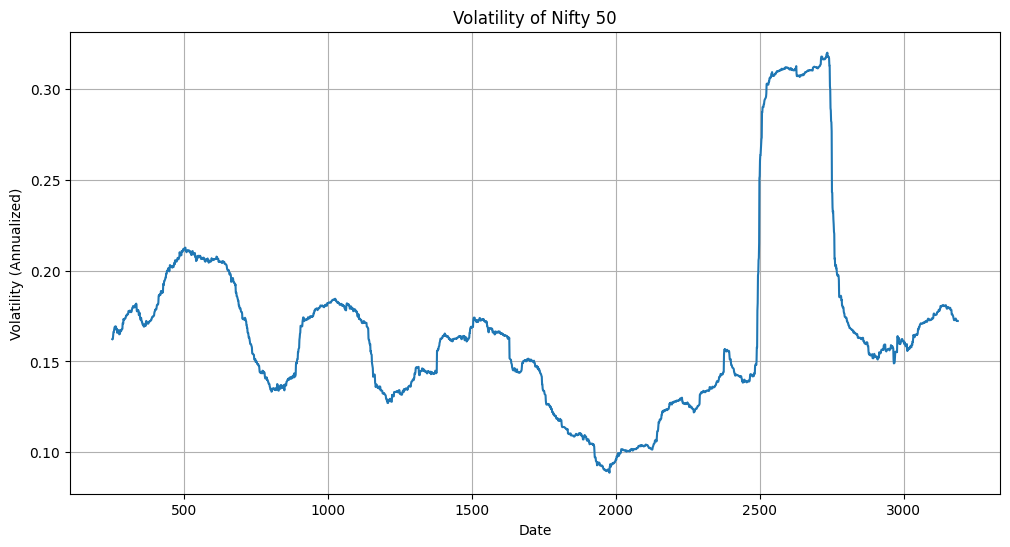

In [108]:
# Plotting volatility
plt.figure(figsize=(12, 6))
data['Volatility'].plot()
plt.title('Volatility of Nifty 50')
plt.xlabel('Date')
plt.ylabel('Volatility (Annualized)')
plt.grid(True)
plt.show()


## Displaying key statistics

In [109]:
mean_daily_return = data['Daily_Return'].mean()
std_dev_daily_return = data['Daily_Return'].std()
annualized_volatility = data['Volatility'].iloc[-1]  # Using the last value as an example

print(f"Mean Daily Return: {mean_daily_return:.4f}")
print(f"Standard Deviation of Daily Returns: {std_dev_daily_return:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")

Mean Daily Return: 0.0004
Standard Deviation of Daily Returns: 0.0110
Annualized Volatility: 0.1723


---
## 5. Model Building and Evaluation

### Feature and Target Variable Preparation:

- **Features:** 'Open', 'High', 'Low', 'Close', 'Volume'
- **Target:** 'Volatility'

In [116]:
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training:

A Random Forest Regressor model was selected for its ability to handle complex relationships in the data.

In [111]:
# Initialize Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

#### Model Evaluation:

The model's performance was evaluated using Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE).

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')


Mean Squared Error: 0.0009
R-squared: 0.6664
Mean Absolute Error: 0.0146


#### Feature Importance:

The importance of each feature in predicting volatility was analyzed and visualized.

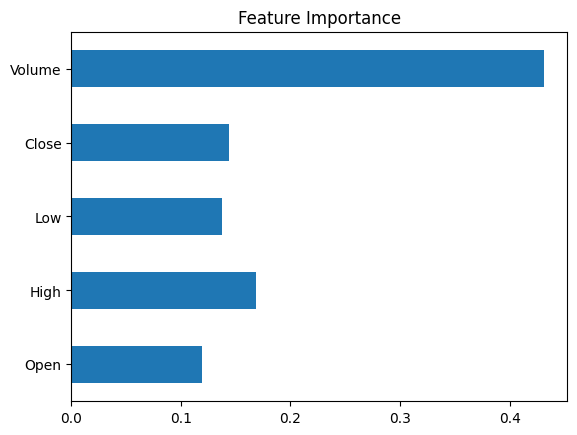

In [113]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


---
## 6. Final Output and Predictions

## Results:

A CSV file was generated containing the actual and predicted volatility values for the test dataset. This file provides a comprehensive comparison between the observed market volatility and the volatility predicted by the machine learning model. 

The predictions offer valuable insights for stakeholders such as investors, financial analysts, and policymakers. They can use this information to assess market risk, optimize investment strategies, and make informed decisions based on anticipated volatility trends.

The CSV file represents the tangible output of the project's predictive capabilities, demonstrating the practical application of machine learning in forecasting financial market dynamics.


In [123]:
# Save predictions and actual values to a CSV file for further analysis
results_df = pd.DataFrame({'Actual_Volatility': y_test, 'Predicted_Volatility': y_pred})
results_df.to_csv('volatility_predictions.csv', index=False)

# Read the result CSV file and display the first few rows
result_df = pd.read_csv('volatility_predictions.csv')
print(result_df.head())

   Actual_Volatility  Predicted_Volatility
0           0.174392              0.172318
1           0.162000              0.153712
2           0.094104              0.102429
3           0.192773              0.199191
4           0.163218              0.146781


#### Visualization of Actual vs. Predicted Volatility:

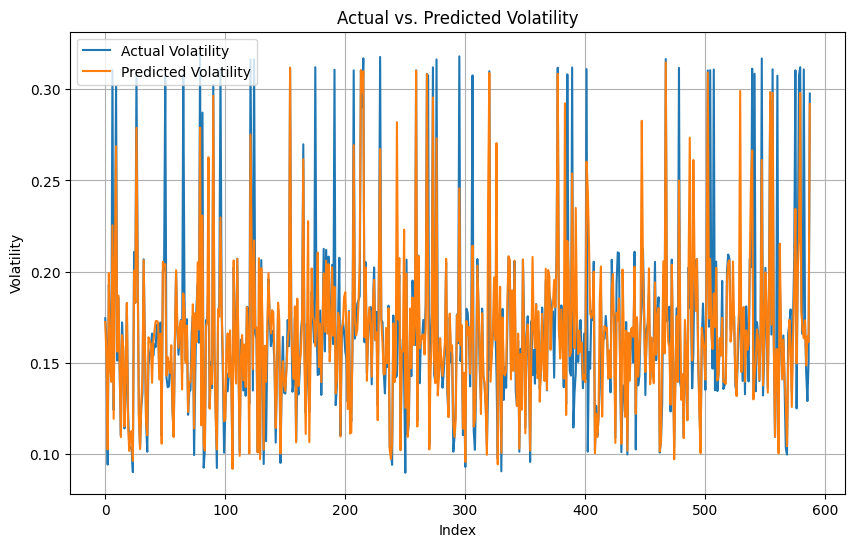

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(result_df['Actual_Volatility'], label='Actual Volatility')
plt.plot(result_df['Predicted_Volatility'], label='Predicted Volatility')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.title('Actual vs. Predicted Volatility')
plt.legend()
plt.grid(True)
plt.show()


#### Key Performance Metrics:

- **Mean Squared Error (MSE):** 0.0009
- **R-squared (R²):** 0.6664
- **Mean Absolute Error (MAE):** 0.0146


---
### 7. Future Work and Conclusion

#### Future Work:

- **Model Refinement:** Further tuning of hyperparameters and exploring other machine learning algorithms could enhance prediction accuracy.
- **Additional Features:** Incorporating macroeconomic indicators, sentiment analysis from news articles, and global market indices could improve the model's predictive power.
- **Real-Time Deployment:** Integrating the model into a real-time data pipeline and deploying it on cloud platforms for continuous monitoring and updating of volatility predictions.


#### Conclusion:

This project successfully demonstrates the application of machine learning techniques to forecast financial market volatility in India. The developed model exhibits reasonable predictive performance, as evidenced by the following key metrics:

- **Mean Squared Error (MSE):** 0.0009
- **R-squared (R²):** 0.6664
- **Mean Absolute Error (MAE):** 0.0146

The analysis provides valuable insights into the factors influencing market volatility, such as historical price data and trading volume. By accurately predicting volatility, this model contributes to better risk management strategies and informed investment decisions in financial markets.

The project also lays a solid foundation for further enhancements and real-world deployment. Future work could focus on refining the model through hyperparameter tuning, incorporating additional features like macroeconomic indicators and sentiment analysis, and deploying it in real-time environments for continuous monitoring and updating of volatility predictions.

Overall, this project underscores the importance of data-driven approaches in financial analysis and highlights the potential for machine learning to improve risk management and investment strategies in dynamic market environments.
